In [45]:
import warnings

In [47]:
# Suppress the specific FutureWarning (seaborn calls deprecated use_inf_as_na option)
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [53]:
# Sample data: SSNs, earnings, and SSDI status
data = {
    'SSN': ['123-45-6789', '987-65-4321', '456-78-9012', '111-22-3333', '222-33-4444'],
    'Earnings': [2000, 1500, 3000, 1200, 1700],
    'Receiving_SSDI': [1, 0, 1, 0, 1]  # 1 if receiving SSDI, 0 otherwise
}

In [55]:
# Create DataFrame
df = pd.DataFrame(data)

In [57]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
# Feature engineering
df['Above_Threshold'] = df['Earnings'] > 1550

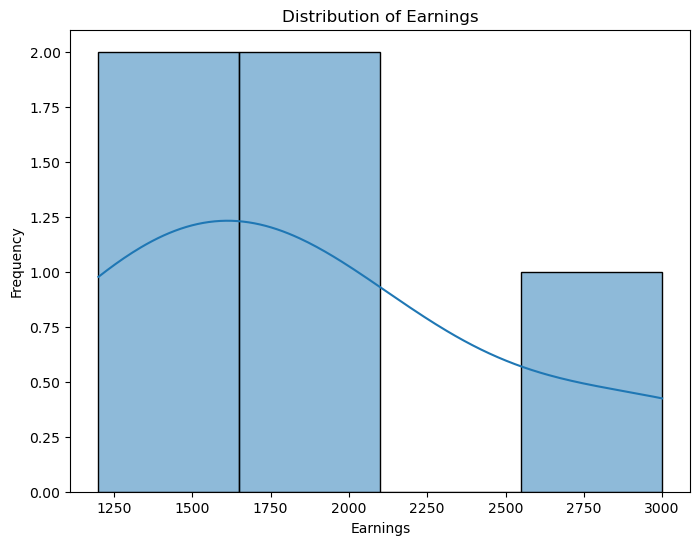

In [61]:
# Plot the distribution of earnings
plt.figure(figsize=(8, 6))
sns.histplot(df['Earnings'].dropna(), kde=True)  # Drop NaN values before plotting
plt.title('Distribution of Earnings')
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Splitting features and labels
X = df[['Earnings', 'Above_Threshold']]
y = df['Receiving_SSDI']

In [65]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Initializing the model
model = LogisticRegression()

In [71]:
# Training the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [75]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [77]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

In [79]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


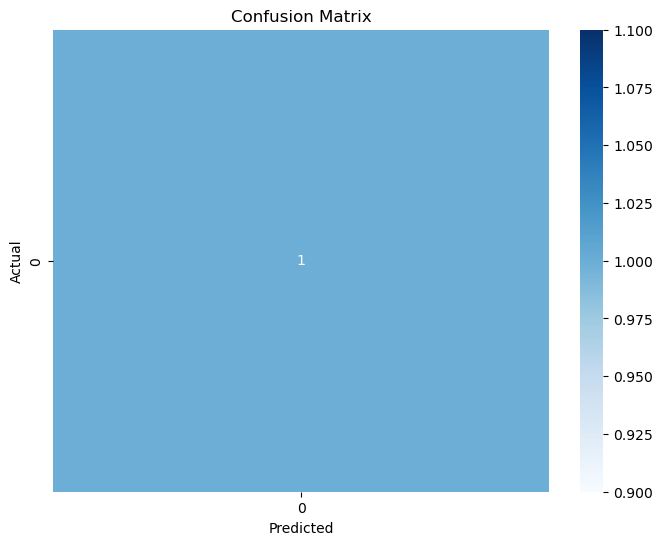

In [81]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
# ROC Curve
if len(np.unique(y_test)) > 1:  # Check if there are both positive and negative samples
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is not plotted because there are no positive samples in y_test.")

ROC curve is not plotted because there are no positive samples in y_test.


In [89]:
# Example new data for prediction
new_data = pd.DataFrame({
    'SSN': ['555-66-7777', '888-99-0000'],
    'Earnings': [1800, 1400]
})
new_data['Above_Threshold'] = new_data['Earnings'] > 1550

In [91]:
# Preprocessing the new data
new_data_scaled = scaler.transform(new_data[['Earnings', 'Above_Threshold']])

In [93]:
# Making predictions
new_data['Receiving_SSDI_Pred'] = model.predict(new_data_scaled)

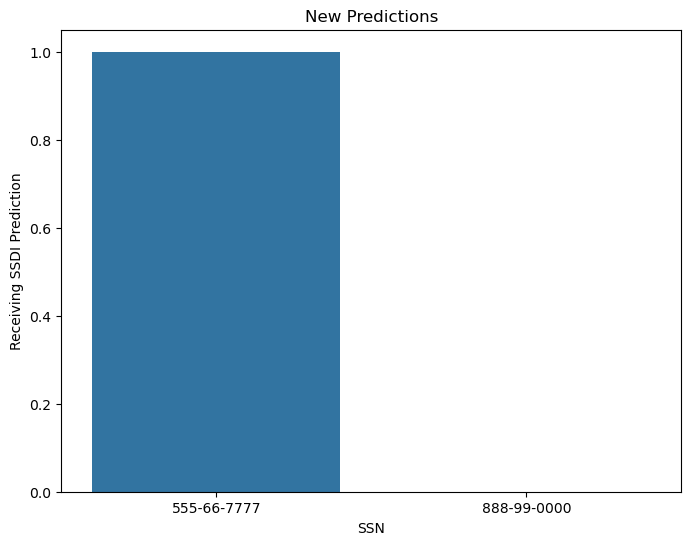

           SSN  Earnings  Above_Threshold  Receiving_SSDI_Pred
0  555-66-7777      1800             True                    1
1  888-99-0000      1400            False                    0


In [95]:
# Visualizing the new predictions
plt.figure(figsize=(8, 6))
sns.barplot(x=new_data['SSN'], y=new_data['Receiving_SSDI_Pred'])
plt.title('New Predictions')
plt.xlabel('SSN')
plt.ylabel('Receiving SSDI Prediction')
plt.show()

print(new_data)